In [7]:
# Since the dataset is available in Google Drive, mount the Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Cheetah vs Hyena/train'
validation_dir = '/content/drive/MyDrive/Cheetah vs Hyena/test'

In [9]:
import os  # Importing the os module to interact with the file system

# Count and print the number of images in the training directory for cheetah
print(len(os.listdir('/content/drive/MyDrive/Cheetah vs Hyena/train/cheetah')))

# Count and print the number of images in the training directory for hyena
print(len(os.listdir('/content/drive/MyDrive/Cheetah vs Hyena/train/hyena')))


# Count and print the number of images in the testing directory for cheetah
print(len(os.listdir('/content/drive/MyDrive/Cheetah vs Hyena/test/cheetah')))


# Count and print the number of images in the testing directory for cats
print(len(os.listdir('/content/drive/MyDrive/Cheetah vs Hyena/test/hyena')))

900
900
100
100


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the main directory for the dataset
dataset_dir = '/content/drive/MyDrive/Cheetah vs Hyena'

# Image data generators for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split 20% of the images for validation
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # Set as validation data
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # First max-pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Second max-pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Third max-pooling layer
    Flatten(),  # Flatten the 2D matrices into 1D vectors
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [13]:
# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary cross-entropy loss function
    optimizer='adam',  # Adam optimizer
    metrics=['accuracy']  # Evaluate with accuracy metric
)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/15
50/50 [==============================] - 543s 11s/step - loss: 0.4199 - accuracy: 0.8913 - val_loss: 0.3138 - val_accuracy: 0.9036
Epoch 2/15
50/50 [==============================] - 133s 3s/step - loss: 0.3391 - accuracy: 0.9000 - val_loss: 0.3267 - val_accuracy: 0.8984
Epoch 3/15
50/50 [==============================] - 131s 3s/step - loss: 0.3587 - accuracy: 0.9000 - val_loss: 0.3740 - val_accuracy: 0.8984
Epoch 4/15
50/50 [==============================] - 123s 2s/step - loss: 0.3442 - accuracy: 0.9000 - val_loss: 0.3668 - val_accuracy: 0.8958
Epoch 5/15
50/50 [==============================] - 119s 2s/step - loss: 0.3375 - accuracy: 0.9000 - val_loss: 0.3279 - val_accuracy: 0.8984
Epoch 6/15
50/50 [==============================] - 129s 3s/step - loss: 0.3349 - accuracy: 0.9000 - val_loss: 0.3363 - val_accuracy: 0.8958
Epoch 7/15
50/50 [==============================] - 132s 3s/step - loss: 0.3363 - accuracy: 0.9000 - val_loss: 0.3269 - val_accuracy: 0.8984
Epoch 8/15
5

In [15]:
# Save the model
model.save('cheetah_vs_hyenas_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Evaluate the model
eval_result = model.evaluate(validation_generator)
print(f"Validation loss: {eval_result[0]}, Validation accuracy: {eval_result[1]}")

13/13 [==============================] - 9s 690ms/step - loss: 0.3301 - accuracy: 0.9000
Validation loss: 0.33009257912635803, Validation accuracy: 0.8999999761581421


In [17]:
# Plot accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

In [18]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

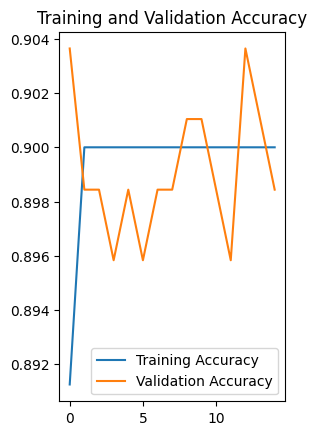

In [19]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

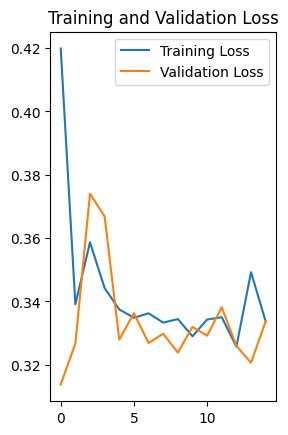

In [20]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [21]:
plt.show()

In [22]:
# Predict on validation data
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).astype(int)

13/13 [==============================] - 12s 866ms/step


In [23]:
# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Cheetah', 'Hyena'])

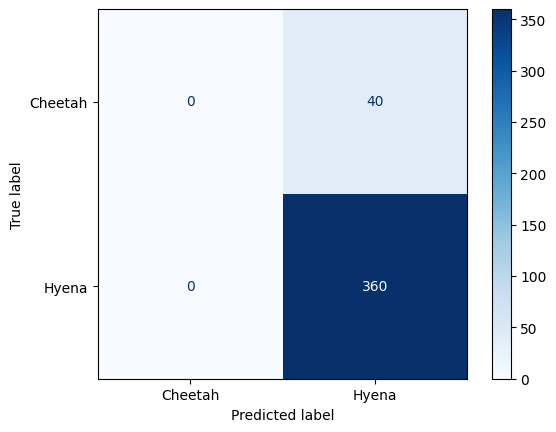

In [24]:
# Plot confusion matrix
cm_display.plot(cmap='Blues')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = validation_generator.classes
predicted_labels = (Y_pred > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  0  40]
 [  0 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.90      1.00      0.95       360

    accuracy                           0.90       400
   macro avg       0.45      0.50      0.47       400
weighted avg       0.81      0.90      0.85       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Image data generators for data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split 20% of the images for validation
)

In [26]:
# Create data generators
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # Set as training data
)

Found 1600 images belonging to 2 classes.


In [27]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # Set as validation data
)

Found 400 images belonging to 2 classes.


In [28]:
# Define the ResNet model
resnet_model = Sequential()

In [29]:
# Load the pre-trained ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the top layer
    input_shape=(256, 256, 3),
    pooling='max',  # Global max pooling
    weights='imagenet'  # Use weights trained on ImageNet
)

94765736/94765736 [==============================] - 1s 0us/step


In [30]:
# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

In [31]:
# Add the pre-trained model to our sequential model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [32]:
# Print the model summary
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [35]:
from keras.optimizers import Adam
# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
# Train the model
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/15
50/50 [==============================] - ETA: 0s - loss: 0.3381 - accuracy: 0.9000

KeyboardInterrupt: 